In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Python/AWD'

Mounted at /content/gdrive


In [ ]:
import sys

sys.path.append(root_path)

In [ ]:
import os

import pandas as pd
import tensorflow as tf

from src.datasets import MNISTDataSet
from src.models import GenerativeMatchingNetwork
from src.utils import image

Set up Model and DataSet objects

In [ ]:
mnist_df = pd.read_csv(os.path.join(root_path, r"data/mnist/mnist-data-set.csv"))
mnist_df = mnist_df.loc[mnist_df["label"] == 0]  # loc only 0 images
mnist_data_set =  MNISTDataSet(mnist_df)

In [ ]:
generative_model = GenerativeMatchingNetwork(latent_dim=100)
generative_model.compile()  # compile with defaults

In [ ]:
generative_model.fit(mnist_data_set, n_epochs=10, silent=False)

100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


Compare real and generated data points 

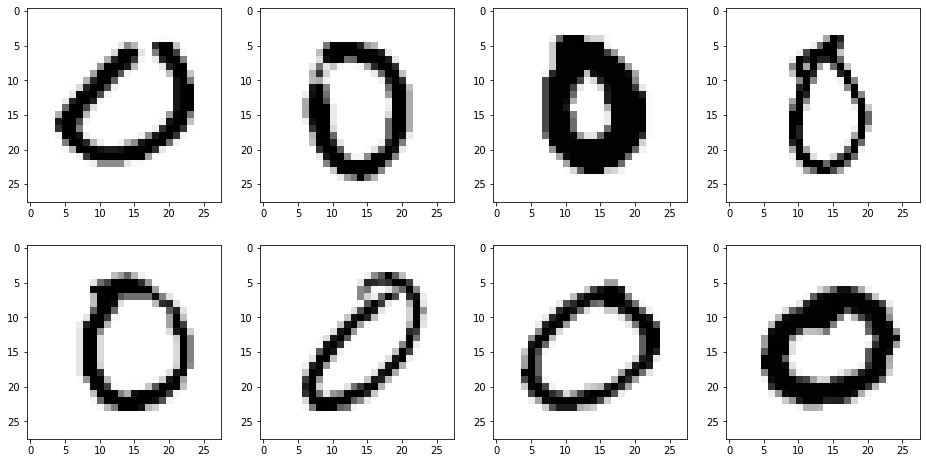

In [ ]:
image.show_batch(mnist_data_set.real_batch(size=8)[0])

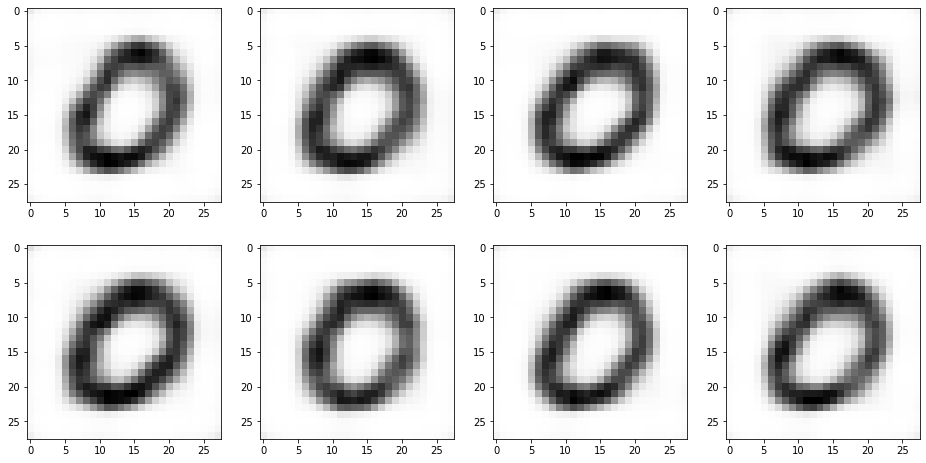

In [ ]:
generated_batch = generative_model.generate(mnist_data_set.latent_batch(size=8, latent_dim=100))
image.show_generated_batch(generated_batch)